In [1]:
import sys


In [4]:
!{sys.executable} -m pip install tensorflow

    100% |████████████████████████████████| 44.4MB 30kB/s  eta 0:00:01   20% |██████▋                         | 9.1MB 56.0MB/s eta 0:00:01    39% |████████████▊                   | 17.7MB 55.3MB/s eta 0:00:01
    100% |████████████████████████████████| 3.0MB 470kB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 11.3MB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 12.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/45/07/0e/6880381ca521796cf6cc18ba4ab502c2232e5777099b4df4ae
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/6f/85/6c/56b8e1292c6214c4eb73b9dda50f53e8e977bf65989373c962
Successfully built absl-py html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing in

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [4]:
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [5]:
num_classes

10

In [6]:
print('Train set size : ', train_features.shape[0])
print('Test set size : ', test_features.shape[0])

Train set size :  50000
Test set size :  10000


In [7]:

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [8]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing for use 16 cores on plon.io
import tensorflow as tf
import multiprocessing as mp


4
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


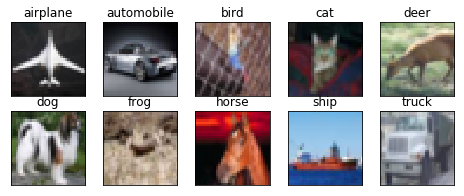

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
__________

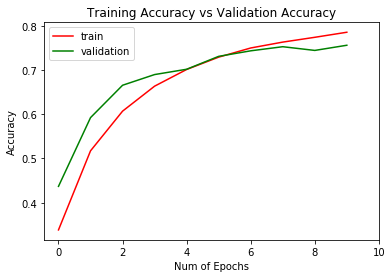

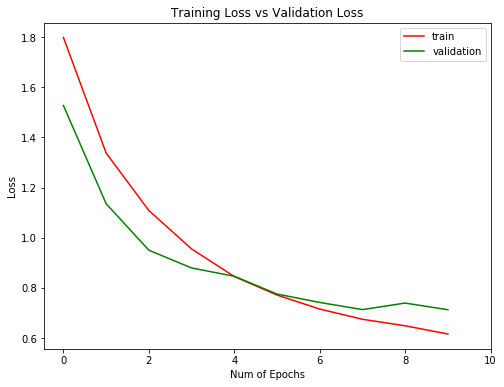

Accuracy: 75.61%
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[830  11  79  13  10   1   4   9  21  22]
 [ 13 896   2   6   3   8   2   2  10  58]
 [ 51   1 702  40  77  49  50  15  10   5]
 [ 38   6  87 523  58 179  61  25  12  11]
 [ 37   0  93  44 717  21  29  49   5   5]
 [ 18   3  55 122  39 693  27  31   5   7]
 [ 12   3  40  39  45  24 817   7   5   8]
 [ 17   0  44  45  60  32   7 778   4  13]
 [116  32  13  11   7   6   6   6 784  19]
 [ 45  71   9   9   3   6   3   7  26 821]]


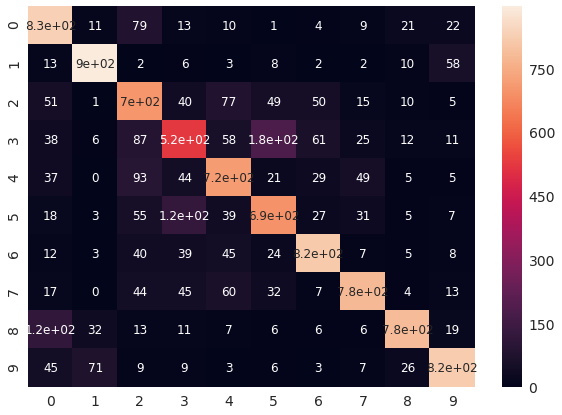

In [9]:
# MaxPooling 2D with RELU




core_num = mp.cpu_count()
print(core_num)
config = tf.ConfigProto(
    inter_op_parallelism_threads=core_num,
    intra_op_parallelism_threads=core_num)
sess = tf.Session(config=config)


# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 10 # repeat 200 times
data_augmentation = True


(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Define Model

def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))



    sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=False)

# Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()


# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

4
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


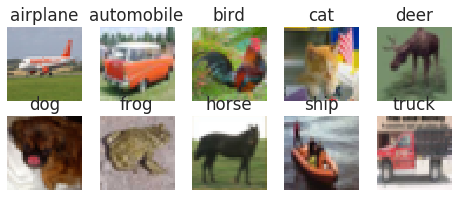

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 16, 16)        36928     
__________

Epoch 41/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.1424 - acc: 0.9530 - val_loss: 0.9892 - val_acc: 0.7814
Epoch 42/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.1375 - acc: 0.9539 - val_loss: 0.9338 - val_acc: 0.7891
Epoch 43/50
50000/50000 [==============================] - 26s 521us/step - loss: 0.1326 - acc: 0.9570 - val_loss: 0.9960 - val_acc: 0.7806
Epoch 44/50
50000/50000 [==============================] - 26s 521us/step - loss: 0.1276 - acc: 0.9575 - val_loss: 0.9656 - val_acc: 0.7881
Epoch 45/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.1352 - acc: 0.9555 - val_loss: 0.9434 - val_acc: 0.7890
Epoch 46/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.1199 - acc: 0.9605 - val_loss: 0.9993 - val_acc: 0.7831
Epoch 47/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.1222 - acc: 0.9591 - val_loss: 0.9357 - val_acc: 0.7879
Epoch 48/50
50000/50

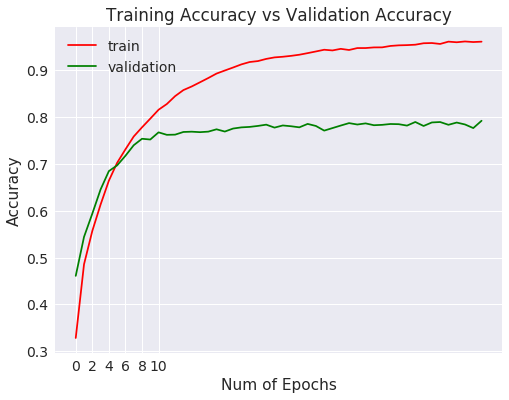

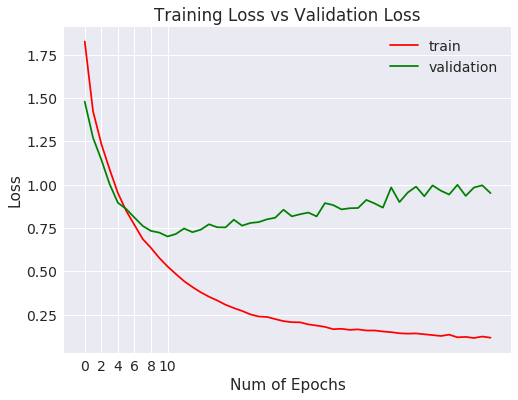

Accuracy: 79.17%
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[840   8  40  17   7   2   6   9  37  34]
 [ 18 891   2   6   4   5   4   0   9  61]
 [ 63   4 701  64  59  41  43  14   7   4]
 [ 12   4  37 632  59 146  50  31  11  18]
 [ 21   3  41  56 782  23  19  48   5   2]
 [ 11   2  33 154  44 700  15  27   4  10]
 [  5   5  27  55  33  25 831   5  13   1]
 [  7   1  31  34  42  39   5 823   1  17]
 [ 56  21  12  16   5   3   5   4 856  22]
 [ 30  46   9  11   4   5   6   5  23 861]]


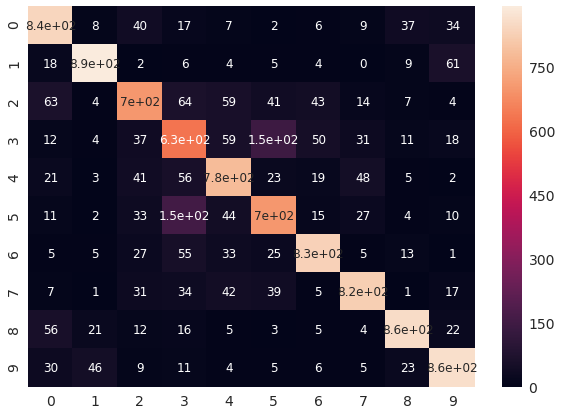

In [10]:
#Average Pooling with RELU


core_num = mp.cpu_count()
print(core_num)
config = tf.ConfigProto(
    inter_op_parallelism_threads=core_num,
    intra_op_parallelism_threads=core_num)
sess = tf.Session(config=config)


# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 50 # repeat 200 times
data_augmentation = True


(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Define Model

def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))



    sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=False)

# Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()


# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

4
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


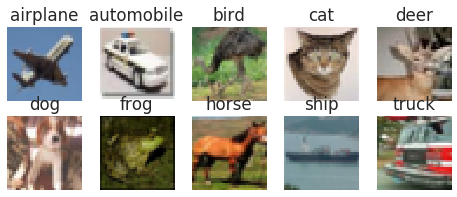

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 16, 16)        36928     
__________

Epoch 41/50
50000/50000 [==============================] - 26s 529us/step - loss: 0.5055 - acc: 0.8327 - val_loss: 0.9891 - val_acc: 0.7214
Epoch 42/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.5180 - acc: 0.8274 - val_loss: 0.9683 - val_acc: 0.7204
Epoch 43/50
50000/50000 [==============================] - 26s 526us/step - loss: 0.5418 - acc: 0.8206 - val_loss: 1.0332 - val_acc: 0.6982
Epoch 44/50
50000/50000 [==============================] - 26s 528us/step - loss: 0.5290 - acc: 0.8231 - val_loss: 0.9855 - val_acc: 0.7235
Epoch 45/50
50000/50000 [==============================] - 26s 525us/step - loss: 0.5158 - acc: 0.8291 - val_loss: 1.0784 - val_acc: 0.6984
Epoch 46/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.5210 - acc: 0.8269 - val_loss: 0.9994 - val_acc: 0.7075
Epoch 47/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.5206 - acc: 0.8254 - val_loss: 0.9822 - val_acc: 0.7220
Epoch 48/50
50000/50

In [11]:
# MaxPoolin with "tanh" activation


core_num = mp.cpu_count()
print(core_num)
config = tf.ConfigProto(
    inter_op_parallelism_threads=core_num,
    intra_op_parallelism_threads=core_num)
sess = tf.Session(config=config)


# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 50 # repeat 200 times
data_augmentation = True


(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Define Model

def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='tanh', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='tanh'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='tanh'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))



    sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=False)

# Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()


# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)


scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


4
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


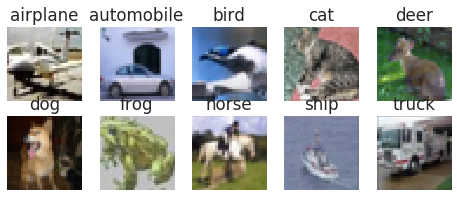

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 16, 16)        36928     
__________

Epoch 41/50
50000/50000 [==============================] - 26s 528us/step - loss: 2.3034 - acc: 0.0967 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 26s 527us/step - loss: 2.3034 - acc: 0.0963 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 26s 528us/step - loss: 2.3032 - acc: 0.1000 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 26s 529us/step - loss: 2.3033 - acc: 0.0987 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 26s 529us/step - loss: 2.3032 - acc: 0.0988 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 26s 528us/step - loss: 2.3033 - acc: 0.0983 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 27s 530us/step - loss: 2.3033 - acc: 0.0984 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 48/50
50000/50

In [12]:
# Maxpooling with ELU

core_num = mp.cpu_count()
print(core_num)
config = tf.ConfigProto(
    inter_op_parallelism_threads=core_num,
    intra_op_parallelism_threads=core_num)
sess = tf.Session(config=config)


# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 50 # repeat 200 times
data_augmentation = True


(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Define Model

def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='elu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='elu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='elu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))



    sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=False)

# Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()


# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)


scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


4
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


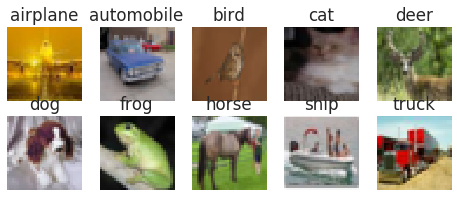

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_22 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 16, 16)        36928     
__________

KeyboardInterrupt: 

In [13]:
core_num = mp.cpu_count()
print(core_num)
config = tf.ConfigProto(
    inter_op_parallelism_threads=core_num,
    intra_op_parallelism_threads=core_num)
sess = tf.Session(config=config)


# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 50 # repeat 200 times
data_augmentation = True


(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Define Model

def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='elu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='elu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='elu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='elu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))



    adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

# Train model

    model.compile(loss='categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()


# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)


scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


4
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


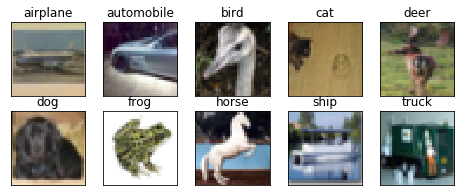

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 32, 32)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 32, 32)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 30, 30)       73856     
__________

KeyboardInterrupt: 

In [3]:
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D , AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing for use 16 cores on plon.io
import tensorflow as tf

core_num = mp.cpu_count()
print(core_num)
config = tf.ConfigProto(
    inter_op_parallelism_threads=core_num,
    intra_op_parallelism_threads=core_num)
sess = tf.Session(config=config)


# Declare variables
LEARN_RATE = 1.0e-4
batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 50 # repeat 200 times
data_augmentation = True


(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Define Model

def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.5))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
 
    model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
    model.add(Dropout(0.5))

    model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))
    

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))


# Train model

    model.compile(loss='categorical_crossentropy',  optimizer = Adam(lr=LEARN_RATE), metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()


# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)


scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))